## ASSIGNMENT - 15

## Topic - Decision Tree Company Problem¶

__Q. A cloth manufacturing company is interested to know about the segment or attributes causes high sale.__

In [38]:
# importing necessary packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
from sklearn.tree import export_graphviz,plot_tree


In [39]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [40]:
#Checking of null values and data_type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [41]:
#Creating copy of data
data1 = data.copy()

In [42]:
# changing target variable to catogerical data

data1["sales"]="small"
data1.loc[data1["Sales"]>7.49,"sales"]="large"
data1.drop(["Sales"],axis=1,inplace=True)

In [43]:
#One-hot encoding

data1['US'] = data1['US'].map({'Yes':1,'No': 0})
data1['Urban'] = data1['Urban'].map({'Yes':1,'No': 0})
data1['ShelveLoc'] = data1['ShelveLoc'].map({'Bad':0,'Good':2,'Medium':1})
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,2,65,10,1,1,large
2,113,35,10,269,80,1,59,12,1,1,large
3,117,100,4,466,97,1,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small


In [45]:
# spliting the data into train and test 

x = data1.iloc[:,0:10]
y = data1.iloc[:,10]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 40)

In [46]:
# model building

model = RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [47]:
# predicting on test data set

preds = model.predict(x_test)  
pd.Series(preds).value_counts()

large    41
small    39
dtype: int64

In [48]:
print(preds)

['large' 'small' 'small' 'large' 'small' 'small' 'large' 'large' 'large'
 'large' 'small' 'small' 'large' 'large' 'large' 'small' 'large' 'large'
 'small' 'small' 'large' 'large' 'large' 'large' 'small' 'small' 'large'
 'small' 'large' 'large' 'large' 'large' 'large' 'large' 'large' 'large'
 'large' 'small' 'small' 'large' 'small' 'small' 'small' 'large' 'small'
 'large' 'small' 'small' 'small' 'small' 'small' 'small' 'large' 'small'
 'small' 'large' 'large' 'small' 'small' 'small' 'small' 'small' 'large'
 'large' 'small' 'large' 'large' 'small' 'large' 'large' 'large' 'large'
 'large' 'small' 'small' 'large' 'small' 'small' 'small' 'small']


In [49]:
#Accuracy
accuracy_score(y_test,preds)

0.775

In [50]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df

,Actual,Predicted
132,large,large
390,small,small
310,large,small
3,small,large
248,small,small
...,...,...
361,large,large
197,small,small
23,small,small
54,small,small


[Text(0.35300925925925924, 0.9583333333333334, 'X[4] <= 105.5\ngini = 0.5\nsamples = 210\nvalue = [162, 158]'),
 Text(0.12037037037037036, 0.875, 'X[2] <= 0.5\ngini = 0.363\nsamples = 73\nvalue = [80, 25]'),
 Text(0.037037037037037035, 0.7916666666666666, 'X[0] <= 98.5\ngini = 0.491\nsamples = 25\nvalue = [21, 16]'),
 Text(0.018518518518518517, 0.7083333333333334, 'gini = 0.0\nsamples = 5\nvalue = [7, 0]'),
 Text(0.05555555555555555, 0.7083333333333334, 'X[0] <= 109.5\ngini = 0.498\nsamples = 20\nvalue = [14, 16]'),
 Text(0.037037037037037035, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 8]'),
 Text(0.07407407407407407, 0.625, 'X[6] <= 74.0\ngini = 0.463\nsamples = 16\nvalue = [14, 8]'),
 Text(0.05555555555555555, 0.5416666666666666, 'X[0] <= 114.0\ngini = 0.291\nsamples = 13\nvalue = [14, 3]'),
 Text(0.037037037037037035, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [6, 0]'),
 Text(0.07407407407407407, 0.4583333333333333, 'X[7] <= 11.5\ngini = 0.397\nsamples = 10\nvalue = [8,

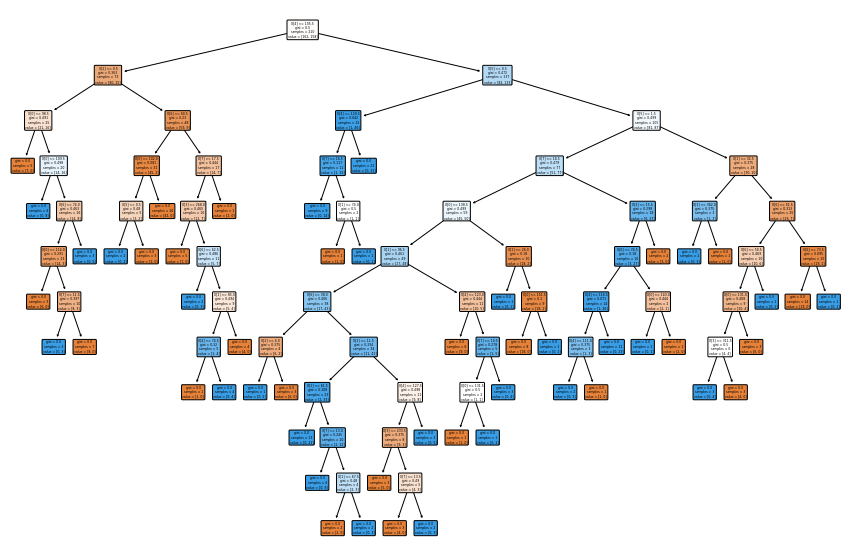

In [51]:
# Plotting of tree

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[2], 
          filled=True, impurity=True, 
          rounded=True)

In [52]:
# Report and confusion matrix

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[29  6]
 [12 33]]
              precision    recall  f1-score   support

       large       0.71      0.83      0.76        35
       small       0.85      0.73      0.79        45

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.79      0.78      0.78        80



In [53]:
model.feature_importances_

array([0.12145718, 0.1023627 , 0.09823913, 0.08389275, 0.24401183,
       0.15469101, 0.11537355, 0.05262735, 0.01268774, 0.01465674])

In [54]:
imp = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
imp

,feature,importance
4,Price,0.244012
5,ShelveLoc,0.154691
0,CompPrice,0.121457
6,Age,0.115374
1,Income,0.102363
2,Advertising,0.098239
3,Population,0.083893
7,Education,0.052627
9,US,0.014657
8,Urban,0.012688


__From the table above, we can conclude that "Price" is the most important feature here.__